<a href="https://colab.research.google.com/github/avinashvarmap/Churn-Prediction/blob/main/churnprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%ls
%cd drive/
%ls
%cd My Drive/
%ls
%cd data/
%ls
%cd Dataset.csv/
%ls

Mounted at /content/drive
drive/  sample_data/
/content/drive
MyDrive/
/content/drive/My Drive
 Blockchain.py  'Colab Notebooks'/   data/  'Untitled spreadsheet.gsheet'
/content/drive/My Drive/data
AmesHousing.txt  BankChurners1.csv  housing_in_london_monthly_variables.csv
AmesHousing.xls  Dataset.csv        housing_in_london_yearly_variables.csv
[Errno 20] Not a directory: 'Dataset.csv/'
/content/drive/My Drive/data
AmesHousing.txt  BankChurners1.csv  housing_in_london_monthly_variables.csv
AmesHousing.xls  Dataset.csv        housing_in_london_yearly_variables.csv


In [ ]:
data = pd.read_csv('/content/drive/My Drive/data/Dataset.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
print(data.shape)

(10000, 14)


In [ ]:
#to check if there are any null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

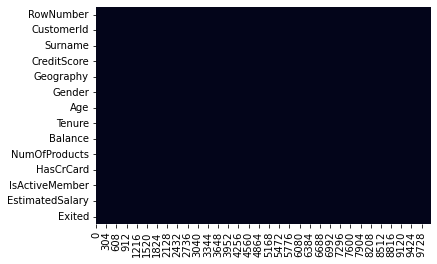

In [ ]:
ax = plt.axes()
sns.heatmap(data.isna().transpose(), cbar=False, ax=ax)


In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df = pd.DataFrame(data)

In [ ]:
categorical = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]

In [ ]:
def category(variable):
    print(df[variable].value_counts())

    sns.countplot(df[variable])
    plt.show()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


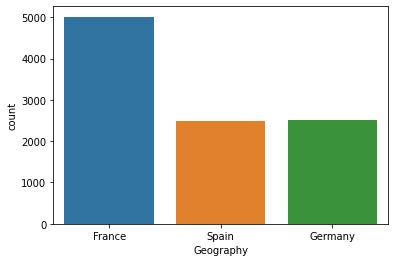

Male      5457
Female    4543
Name: Gender, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


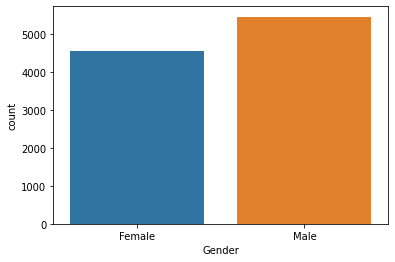

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


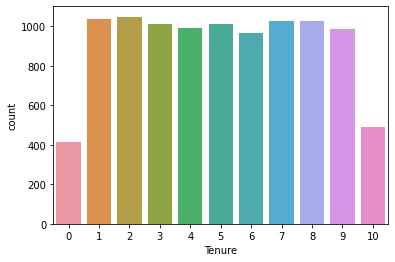

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


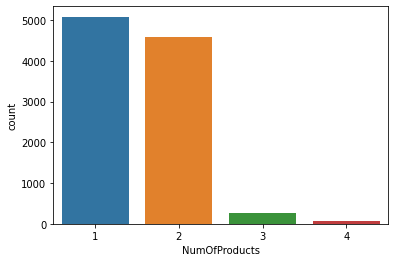

1    7055
0    2945
Name: HasCrCard, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


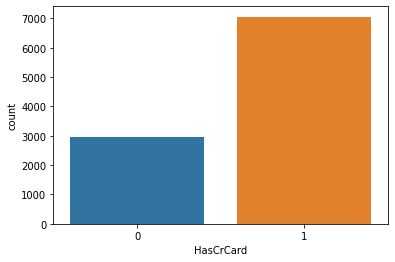

1    5151
0    4849
Name: IsActiveMember, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


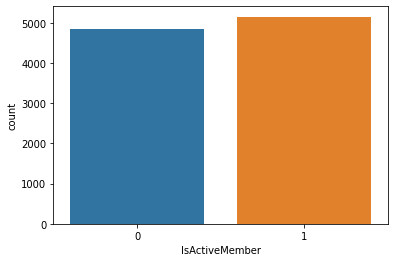

0    7963
1    2037
Name: Exited, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


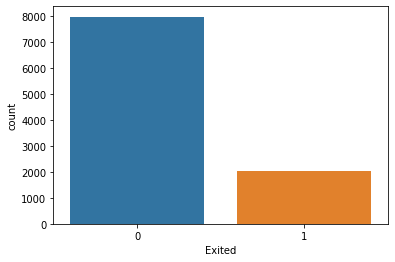

In [ ]:
for i in categorical:
    category(i)

In [ ]:
num_list = ["CreditScore","Age","Balance","EstimatedSalary"]

In [ ]:
def numeric(variable):

    plt.hist(df[variable], bins = 20, color = "orange")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution".format(variable))
    plt.show()

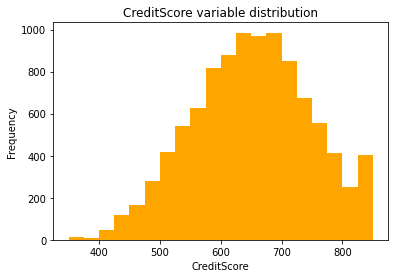

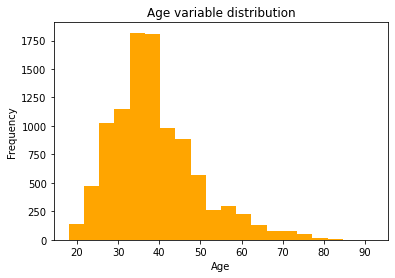

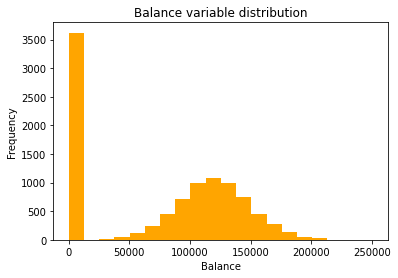

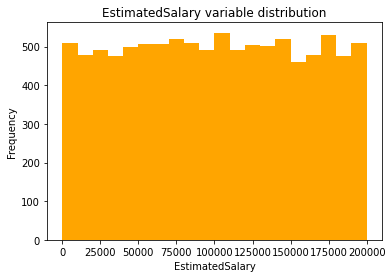

In [ ]:
for i in num_list:
    numeric(i)

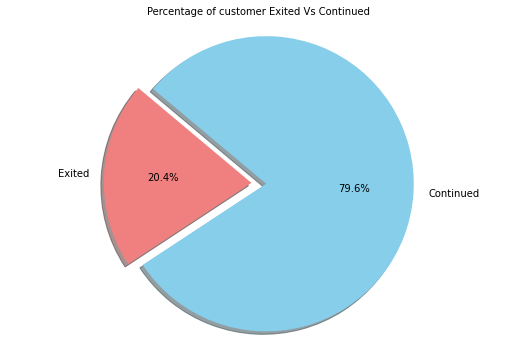

In [ ]:
status = 'Exited', 'Continued'
count_exit = data.Exited[data['Exited']==1].count()
count_cont = data.Exited[data['Exited']==0].count()
sizes = (count_exit, count_cont)
explode = (0, 0.1)
colors = ['lightcoral', 'skyblue', 'yellowgreen']
fig1, ax1 = plt.subplots(figsize=(9,6))
ax1.pie(sizes, explode=explode, labels=status, autopct='%1.1f%%',colors=colors, shadow=True, startangle=140)
ax1.axis('equal')
plt.title("Percentage of customer Exited Vs Continued", size = 10)
plt.show()


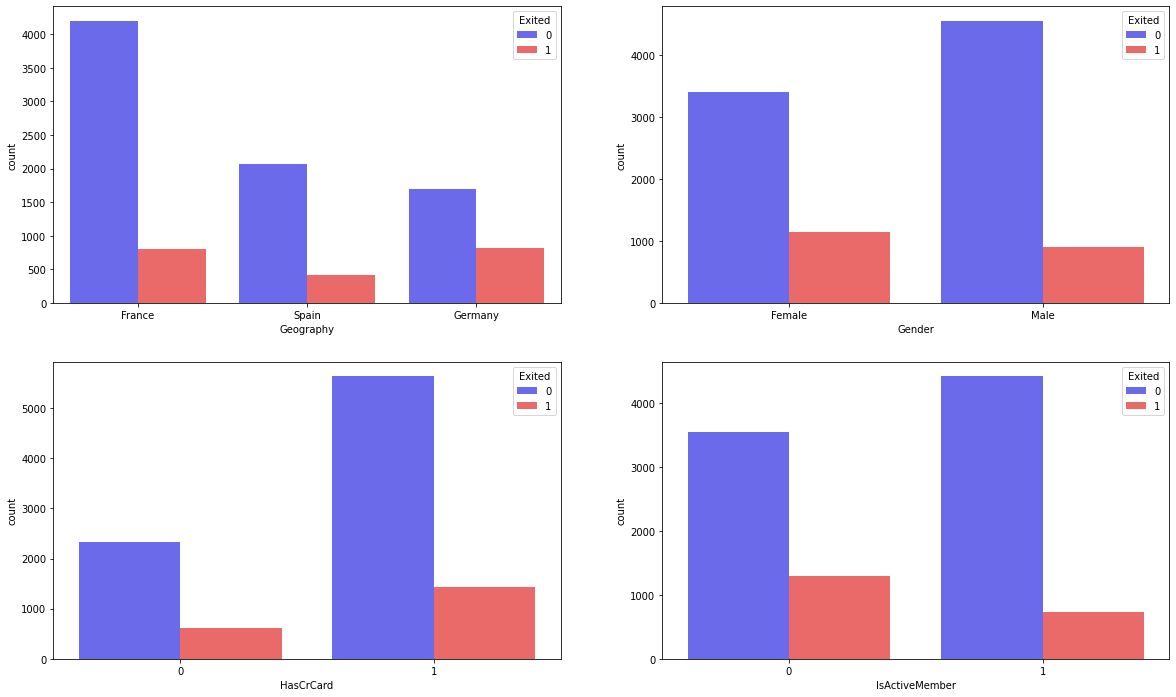

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0], palette = "seismic")
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1], palette = "seismic")
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0], palette = "seismic")
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1], palette = "seismic")

##Data Processing

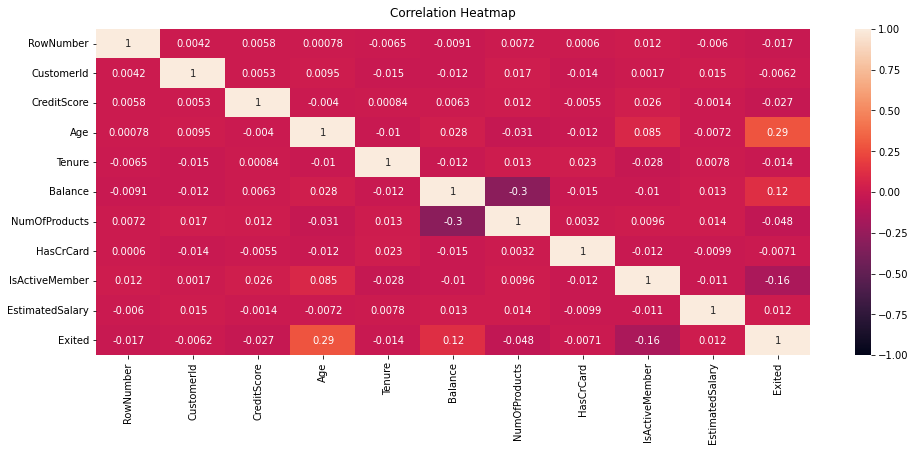

In [ ]:
plt.figure(figsize=(16, 6))
#cormatrix.style.background_gradient(cmap='coolwarm').set_precision(2)
corr_heatmap= sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In this correlation matrix, the Surname, Row number and Customer id are not correlated to each other. So, i have dropped the three features

###Data Reduction

In [ ]:
# Droping Some features as they are not required for analysis
data = data.drop(['CustomerId','Surname','RowNumber'] ,axis=1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###Data Transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
number = LabelEncoder()

data['Geography']= number.fit_transform(data['Geography'])
data['Gender']= number.fit_transform(data['Gender'])


In [ ]:
data['Geography'].unique()
data['Gender'].unique()

array([0, 1])

In [ ]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


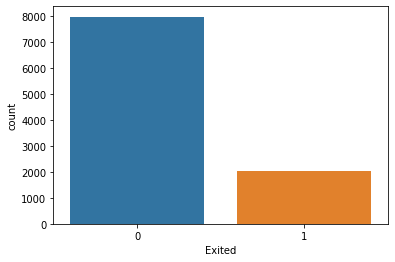

In [ ]:
sns.countplot(data['Exited'])

###Data Splitting

In [ ]:
feature = data.drop("Exited", axis=1)
target = data["Exited"]

In [ ]:
feature.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


###Traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size = 0.2, random_state=42)

In [ ]:
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 8000 records.
The testing dataset has 2000 records.


###Decision Tree model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
# Import Library
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)
print("Decision Tree : {}%".format(accuracy_score(pred,y_test)*100))
print('Classification Report:')
print(classification_report(y_test,pred))

Decision Tree : 78.7%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.46      0.53      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



In [ ]:
print("accuracy:{}%".format(accuracy_score(pred, y_test)*100))
print("precision:{}%".format(precision_score(pred, y_test)*100))
print("recall:{}%".format(recall_score(pred, y_test)*100))
print("f1 score:{}%".format(f1_score(pred, y_test)*100))

accuracy:78.7%
precision:52.67175572519084%
recall:46.308724832214764%
f1 score:49.285714285714285%


###Logistic Regression model

In [ ]:
# Import Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)


In [ ]:
print("Logistic Regression : {}%".format(accuracy_score(pred,y_test)*100))
print('Classification Report:')
print(classification_report(y_test,pred))

In [ ]:
print("accuracy:{}%".format(accuracy_score(pred, y_test)*100))
print("precision:{}%".format(precision_score(pred, y_test)*100))
print("recall:{}%".format(recall_score(pred, y_test)*100))
print("f1 score:{}%".format(f1_score(pred, y_test)*100))

accuracy:81.55%
precision:18.3206106870229%
recall:60.0%
f1 score:28.07017543859649%


###Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Random Forest Model : {:.2f}%".format(accuracy_score(pred,y_test)*100))
print('Classification Report:')
print(classification_report(y_test,pred))

Random Forest Model : 86.80%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
print("accuracy:{}%".format(accuracy_score(pred, y_test)*100))
print("precision:{}%".format(precision_score(pred, y_test)*100))
print("recall:{}%".format(recall_score(pred, y_test)*100))
print("f1 score:{}%".format(f1_score(pred, y_test)*100))

accuracy:86.8%
precision:46.56488549618321%
recall:77.21518987341773%
f1 score:58.0952380952381%


###XGBoost classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:

clf = XGBClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("XGBoost Model : {:.2f}%".format(accuracy_score(pred,y_test)*100))
print('Classification Report:')
print(classification_report(y_test,pred))

XGBoost Model : 86.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [ ]:
print("accuracy:{}%".format(accuracy_score(pred, y_test)*100))
print("precision:{}%".format(precision_score(pred, y_test)*100))
print("recall:{}%".format(recall_score(pred, y_test)*100))
print("f1 score:{}%".format(f1_score(pred, y_test)*100))

accuracy:86.5%
precision:45.29262086513995%
recall:76.39484978540773%
f1 score:56.86900958466453%


###Hyper paramter tuning

#### RandomizedSearchCV for XGBOOST

In [ ]:
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
param_grid = {
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "subsample": [0.6, 0.8, 1.0],

 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

scoring = ['recall']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
# Define random search
random_search = RandomizedSearchCV(estimator=XGBClassifier(),
                           param_distributions=param_grid,
                           n_iter=48,
                           scoring=scoring,
                           refit='recall',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_train, y_train)
# Print grid search summary
#random_result

In [ ]:

print(f'Best hyperparameters of model are: {random_result.best_params_}')

Best hyperparameters of model are: {'subsample': 1.0, 'min_child_weight': 7, 'max_depth': 10, 'gamma': 0.0, 'colsample_bytree': 0.7}


In [ ]:
random = XGBClassifier( min_child_weight= 5, max_depth= 10, subsample = 0.8, gamma= 0.4, colsample_bytree= 0.7)
random.fit(X_train, y_train)
random_pred = random.predict(X_test)
print("XGBoost Model : {:.2f}%".format(accuracy_score(random_pred,y_test)*100))
print('Classification Report:')
print(classification_report(y_test,random_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,random_pred))

XGBoost Model : 86.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Confusion Matrix:
[[1539   68]
 [ 205  188]]


In [ ]:
print("accuracy:{}%".format(accuracy_score(random_pred, y_test)*100))
print("precision:{}%".format(precision_score(random_pred, y_test)*100))
print("recall:{}%".format(recall_score(random_pred, y_test)*100))
print("f1 score:{}%".format(f1_score(random_pred, y_test)*100))

accuracy:86.35000000000001%
precision:47.837150127226465%
recall:73.4375%
f1 score:57.93528505392912%


###GridSearch for XGBoost

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
# Define the search space

param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'eta': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
# Define grid search
grid_search = GridSearchCV(estimator=XGBClassifier(),
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='recall',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)


# Print grid search summary
#grid_result
# Print the best score and the corresponding hyperparameters

print(f'The best hyperparameters are {grid_result.best_params_}')

KeyboardInterrupt: ignored

In [ ]:
grid = XGBClassifier(gamma =  0.01, eta = 0.3, max_depth = 8, min_child_weight = 5, n_estimators = 100)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
print("XGBoost Model : {:.2f}%".format(accuracy_score(grid_pred,y_test)*100))
print('Classification Report:')
print(classification_report(y_test,grid_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,grid_pred))

In [ ]:
print("accuracy:{}%".format(accuracy_score(grid_pred, y_test)*100))
print("precision:{}%".format(precision_score(grid_pred, y_test)*100))
print("recall:{}%".format(recall_score(grid_pred, y_test)*100))
print("f1 score:{}%".format(f1_score(grid_pred, y_test)*100))

###Hyperopt for XGBoost Classifier

In [ ]:
pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import time
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
       'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
      'n_estimators': 180,

   }

In [ ]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))



In [ ]:
eval = [( X_train, y_train), ( X_test, y_test)]



In [ ]:
 #eval = [( X_train, y_train), ( X_test, y_test)]

clf.fit( X_train,  y_train, eval_set=eval, eval_metric="auc", early_stopping_rounds=10,verbose=False)


pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred>0.5)
print ("SCORE:", accuracy)
  # return{'loss': -accuracy, 'status': STATUS_OK }

TypeError: ignored

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]


TypeError: ignored

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)




The best hyperparameters are :  



NameError: ignored

In [ ]:
# Train model using the best parameters
xgboost_hypopt = XGBClassifier(
                           colsample_bytree=0.7,
                           gamma=   7.5,

                           max_depth= 9,
                           reg_alpha=44.0,
                           min_child_weight=7,
                           reg_lambda=0.9
                           ).fit(X_train,y_train)
# Make prediction using the best model
bayesian_opt_predict = xgboost_hypopt.predict(X_test)
# Get predicted probabilities
#bayesian_opt_predict_prob = xgboost_hypopt.predict_proba(X_test)

In [ ]:
print("XGBoost Model : {:.2f}%".format(accuracy_score(bayesian_opt_predict,y_test)*100))
print('Classification Report:')
print(classification_report(y_test,bayesian_opt_predict))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,bayesian_opt_predict))

XGBoost Model : 85.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.79      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000


Confusion Matrix:
[[1568   39]
 [ 244  149]]


In [ ]:
print("accuracy:{}%".format(accuracy_score(bayesian_opt_predict, y_test)*100))
print("precision:{}%".format(precision_score(bayesian_opt_predict, y_test)*100))
print("recall:{}%".format(recall_score(bayesian_opt_predict, y_test)*100))
print("f1 score:{}%".format(f1_score(bayesian_opt_predict, y_test)*100))

accuracy:85.85000000000001%
precision:37.913486005089055%
recall:79.25531914893617%
f1 score:51.2908777969019%
